In [1]:
import numpy as np
import pandas as pd
import os 
import sys
sys.path.append(os.path.abspath('../common')) # add path to common functions

In [2]:
from preprocess import getdfs

train_df, valid_df = getdfs(data = 'text_seq', train_size = 1)

In [5]:
train_df.head()

,input_str,label
0,0000154364642718159661428002624223132284159626...,0
1,0004641596369515436422262614110471596262476161...,0
2,0001543626215965999614422464135806142624051159...,0
3,0000154364224641238614262159689561596284351061...,1
4,0004641899422154362069015966142624761262159661...,1


In [19]:
sequences_train = train_df['input_str']
sequences_valid = valid_df['input_str']

x_train = np.array([[int(char) for char in seq] for seq in sequences_train])
x_valid = np.array([[int(char) for char in seq] for seq in sequences_valid])
y_train = train_df['label'].values
y_valid = valid_df['label'].values

In [52]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers, callbacks

# Define the model
def build_lstm_model(input_length, embedding_dim=16, lstm_units=64):
    # Input: a sequence of digits (0-9)
    input_layer = layers.Input(shape=(input_length,))  # Input shape (sequence length)
    
    # Embedding layer: Each digit is embedded into a 16-dimensional space
    embedding_layer = layers.Embedding(input_dim=10, output_dim=embedding_dim, input_length=input_length)(input_layer)
    
    # LSTM layer: The LSTM processes the embedded sequence
    lstm_layer = layers.LSTM(units = lstm_units,  kernel_regularizer=regularizers.l2(0.001))(embedding_layer)
    dropout_layer = layers.Dropout(0.3)(lstm_layer)
    
    # Output layer: Dense layer with a single unit for binary classification
    output_layer = layers.Dense(1, activation='sigmoid')(lstm_layer)
    
    # Build the model
    model = models.Model(inputs=input_layer, outputs=output_layer)
    
    return model


In [71]:

# Build the LSTM model
input_length = 50  # Length of the input sequence (e.g., 50 digits)
lstm_model = build_lstm_model(input_length=input_length, lstm_units = 40)

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/home/arush-upadhyaya/anaconda3/envs/771/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [72]:
lstm_model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)     │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_14 (Embedding)        │ (None, 50, 16)         │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 40)             │         9,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            41 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,321 (36.41 KB)

 Trainable params: 9,321 (36.41 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

In [74]:
history = lstm_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=20, batch_size=32,
                    callbacks=[early_stopping, lr_scheduler])

Epoch 1/20


222/222 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.5226 - loss: 0.7077 - val_accuracy: 0.5542 - val_loss: 0.6919 - learning_rate: 0.0010
Epoch 2/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.5844 - loss: 0.6711 - val_accuracy: 0.5992 - val_loss: 0.6627 - learning_rate: 0.0010
Epoch 3/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6163 - loss: 0.6540 - val_accuracy: 0.6237 - val_loss: 0.6418 - learning_rate: 0.0010
Epoch 4/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6175 - loss: 0.6519 - val_accuracy: 0.6258 - val_loss: 0.6514 - learning_rate: 0.0010
Epoch 5/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.6307 - loss: 0.6514 - val_accuracy: 0.6196 - val_loss: 0.6445 - learning_rate: 0.0010
Epoch 6/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.6328 - loss: 0.6396 - val_accuracy: 0.6176 - val_loss: 0.6438 - learning_rate: 0.0010
Epoch 7/20
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6337 - loss: 0.6379 - val_

In [75]:
from evaluate import plot_history

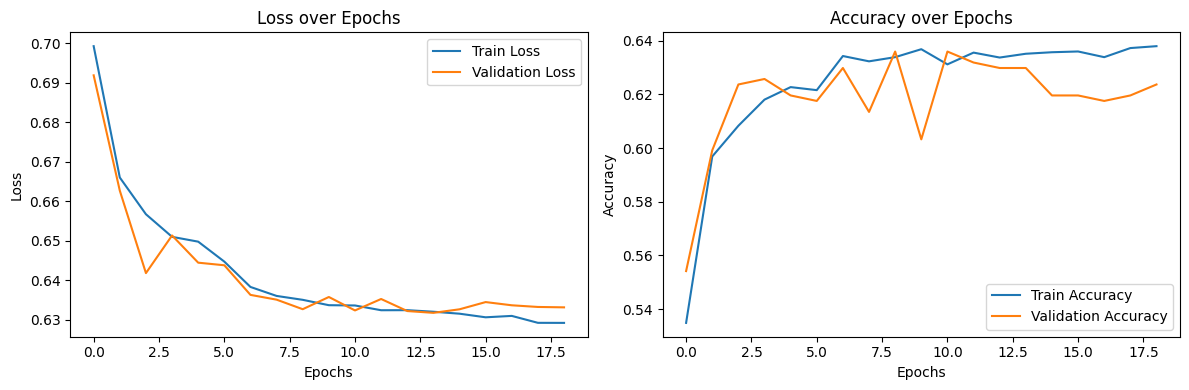

In [76]:
plot_history(history)

In [77]:
y_pred = lstm_model.predict(x_valid)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


In [78]:
y_pred = y_pred > 0.5

==========LSTM on Text Sequences==========
              precision    recall  f1-score   support

     Class 0       0.64      0.64      0.64       252
     Class 1       0.62      0.62      0.62       237

    accuracy                           0.63       489
   macro avg       0.63      0.63      0.63       489
weighted avg       0.63      0.63      0.63       489

Accuracy is 0.6298568507157464
==========LSTM on Text Sequences==========


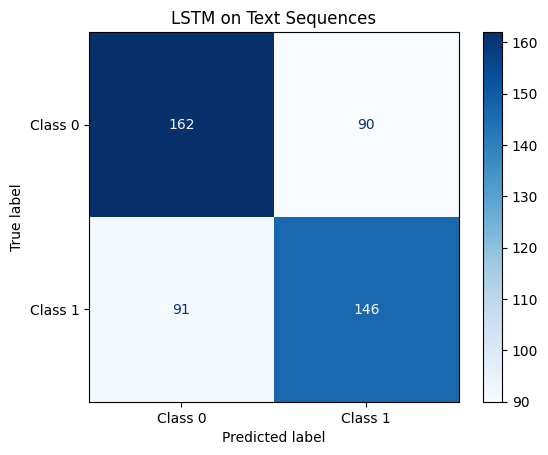

In [79]:
from evaluate import evaluate_predictions
evaluate_predictions(y_valid, y_pred, 'LSTM on Text Sequences')